## Election Data Project - Polls and Donors

In this Data Project we will be looking at data from the 2012 election.

In this project we will analyze two datasets. The first dataset will be the results of political polls. We will analyze this aggregated poll data and answer some questions:

1. ) Who was being polled and what was their party affiliation?
2. ) Did the poll results favor Romney or Obama?
3. ) How do undecided voters effect the poll?
4. ) Can we account for the undecided voters?
5. ) How did voter sentiment change over time?
6. ) Can we see an effect in the polls from the debates?


#### We will analyze the second dataset later on.

The data for the polls will be obtained from HuffPost Pollster. You can check their website __[here](http://elections.huffingtonpost.com/pollster#historical-charts)__. There are some pretty awesome politcal datasets to play with there so I encourage you to go and mess around with it yourself after completing this project.

We're going to use the requests module to import some data from the web. For more information on requests, check out the documentation __[here](http://docs.python-requests.org/en/latest/)__.

We will also be using StringIO to work with csv data we get from HuffPost. StringIO provides a convenient means of working with text in memory using the file API, find out more about it __[here](https://pymotw.com/2/StringIO/)__

### Basic imports

In [1]:
# For handling data
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# Used to grab data from the web (HTTP)
import requests

# Used to work with the cvs file
try:
    from StringIO import StringIO
except ImportError:
    print ("Second option...")
    from io import StringIO

Second option...


### Getting the dataset

In [4]:
# This is the url link for the poll data in csv form
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# Set the proxy configuration in case you need
proxies = {'http':'http://gateway.zscaler.net/',
           'https':'https://gateway.zscaler.net/'}

# Use requests to get the information in text form
source = requests.get(url, proxies = proxies).text

# Use StringIO to avoid an IO error with pandas
poll_data = StringIO(source) 

In [7]:
poll_df = pd.read_csv(poll_data)

In [33]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


In [8]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


### Visualization insight:

In [12]:
poll_df['Affiliation'].value_counts()

None     480
Dem       93
Rep        9
Other      4
Name: Affiliation, dtype: int64

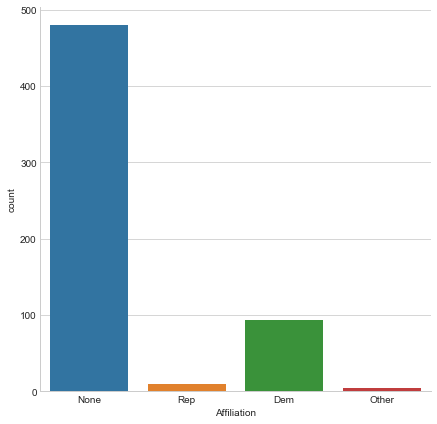

In [15]:
sns.factorplot('Affiliation', data = poll_df, kind= 'count', size=6)

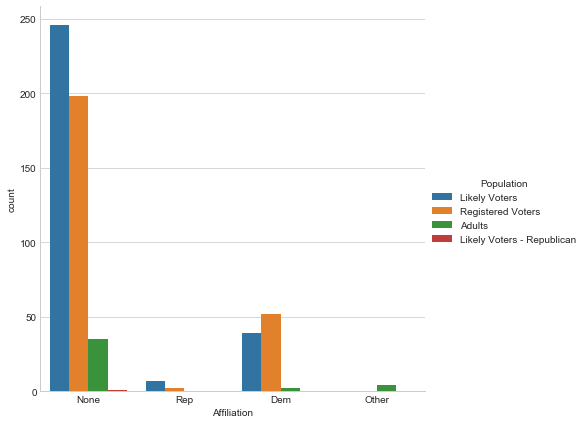

In [39]:
sns.factorplot('Affiliation', data = poll_df, size= 6, hue= 'Population', kind='count')

### Calculate the average 

In [26]:
avg = pd.DataFrame(poll_df.mean())
avg

,0
Number of Observations,1296.679078
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN
Question Iteration,1.000000


In [27]:
avg.drop('Number of Observations', axis=0, inplace=True)
avg.drop('Question Text', axis=0, inplace=True)
avg.drop('Question Iteration', axis=0, inplace=True)

In [28]:
avg

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238


### Calculate the std deviation

In [30]:
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations', axis=0, inplace=True)
std.drop('Question Text', axis=0, inplace=True)
std.drop('Question Iteration', axis=0, inplace=True)
std

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726


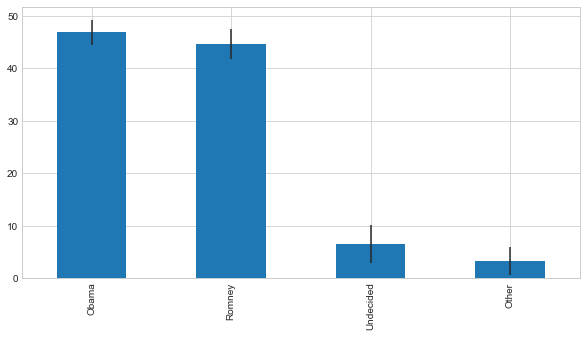

In [36]:
# We conseder the y error like the standard deviation
avg.plot(yerr= std, kind='bar', legend=False, figsize=(10, 5))

### Analize the Undecited voters

The pools indicate that the election race is very close to each other. What the undecided will do? How can they influence the election?

In [43]:
# Concatenate the two df
poll_avg = pd.concat([avg, std], axis =1)
poll_avg.columns= ['Avg', 'Std']
poll_avg

,Avg,Std
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726
